TASK - 2 : IMPLEMENT NON-LINEAR REGRESSION (China_GDP)

Plot Graph between Year and GDP value for given dataset 

Author : Pranali Narkhede

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#loading dataset
df = pd.read_csv("/content/china_gdp.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [5]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


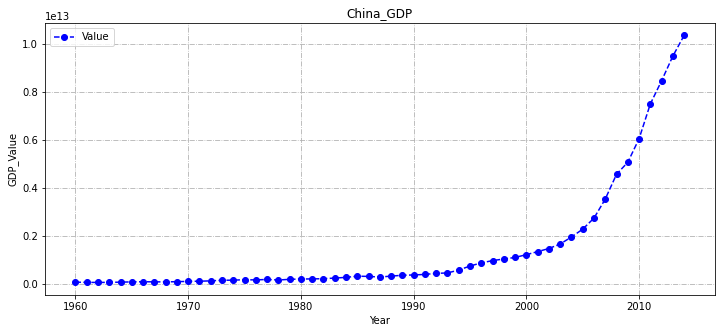

In [9]:
# Plotting graph
plt.figure(figsize=(12,5))
plt.plot("Year","Value",linestyle='--', marker='o', color='b',data=df)
plt.xlabel("Year")
plt.ylabel("GDP_Value")
plt.title("China_GDP")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

It is observed that GDP of China increases slowly, but from 2000 it increases it increases rapidly.

# Building the model

In [10]:
x_data=df["Year"].values
y_data=df["Value"].values

In [11]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

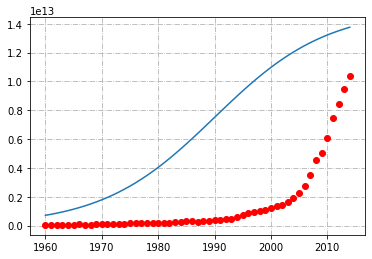

In [29]:

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')
plt.grid(linestyle='-.')
plt.show()

In [17]:
# normalizing our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


# Visualizing the result

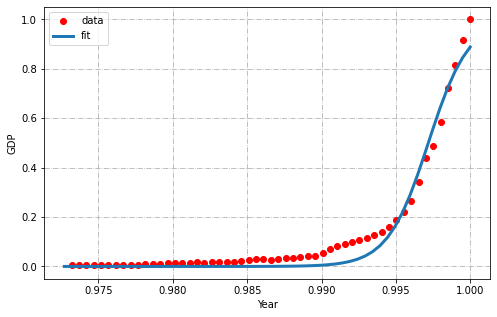

In [26]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.grid(linestyle='-.')
plt.show()

In [21]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [22]:
# build and predicting the model 
popt, pcov = curve_fit(sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)

# Evaluating the model

In [23]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


# THANK YOU